<a href="https://colab.research.google.com/github/pieva/SimPy/blob/main/Due_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Queue Simulation in Python
### Ref: https://www.grotto-networking.com/DiscreteEventPython.html

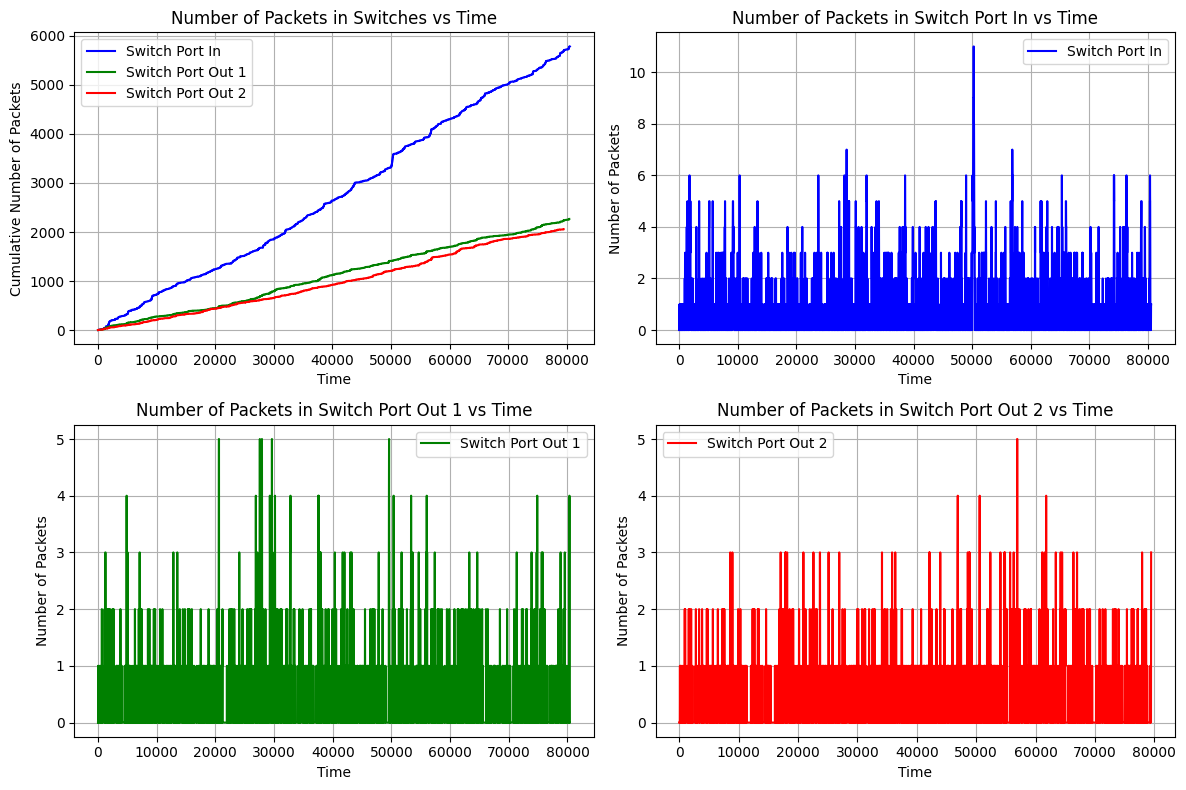

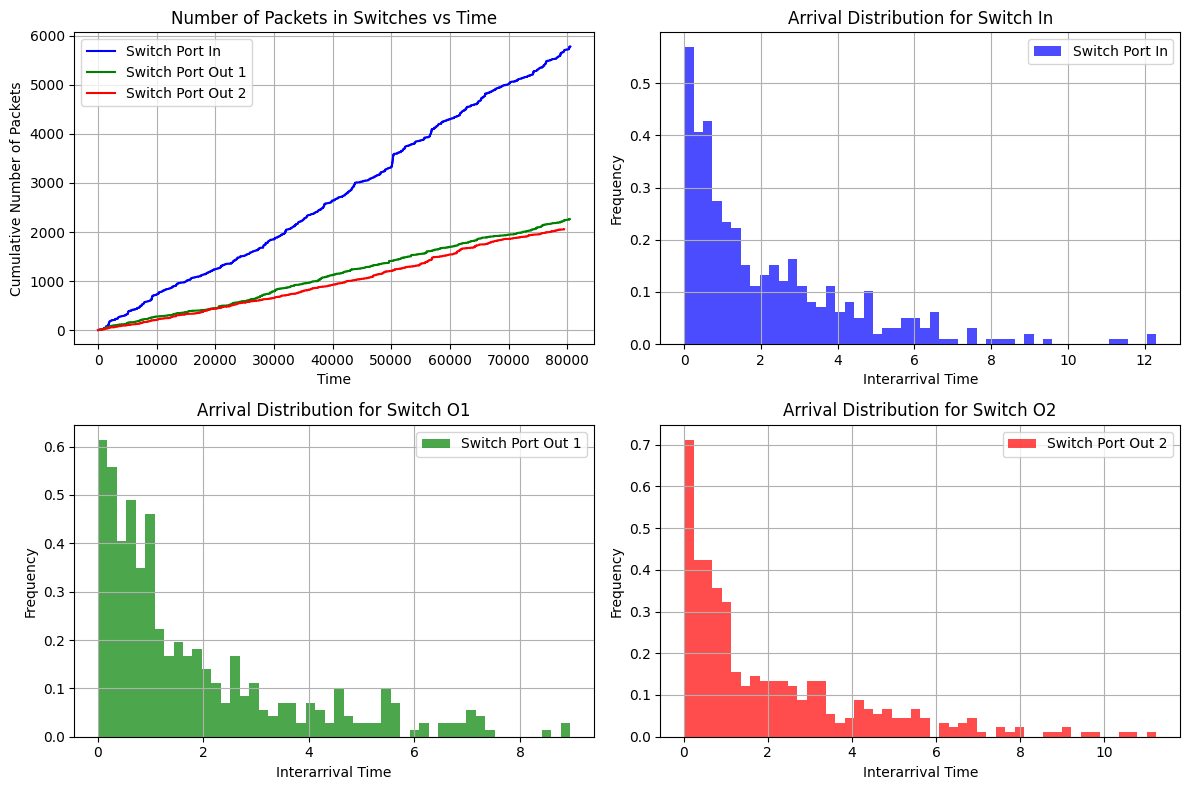

In [ ]:
!pip install simpy

import random
import functools
import simpy
import matplotlib.pyplot as plt
from SimComponents import PacketGenerator, PacketSink, SwitchPort, PortMonitor

# Set up arrival and packet size distributions
adist = functools.partial(random.expovariate, 0.5)
sdist = functools.partial(random.expovariate, 0.01)  # mean size 100 bytes
samp_dist = functools.partial(random.expovariate, 1.0)
port_rate = 1000.0

# Create the SimPy environment
env = simpy.Environment()

# Create the packet generators and sink
pg = PacketGenerator(env, "Greg", adist, sdist)
switch_port_in = SwitchPort(env, port_rate, qlimit=10000)
switch_port_o1 = SwitchPort(env, port_rate, qlimit=10000)
switch_port_o2 = SwitchPort(env, port_rate, qlimit=10000)
ps = PacketSink(env, debug=False, rec_arrivals=True)

# Using a RandomBrancher to split the traffic into two paths
branch = RandomBrancher(env, [0.5, 0.5])

# Wire packet generators, switch ports, and sinks together
pg.out = switch_port_in
switch_port_in.out = branch
branch.outs[0] = switch_port_o1
branch.outs[1] = switch_port_o2
switch_port_o1.out = ps
switch_port_o2.out = ps

# Using a PortMonitor to track queue sizes over time
pm_in = PortMonitor(env, switch_port_in, samp_dist)
pm_o1 = PortMonitor(env, switch_port_o1, samp_dist)
pm_o2 = PortMonitor(env, switch_port_o2, samp_dist)

# Run it
env.run(until=8000)

# Get the time points for each recorded size in PortMonitor and multiply them by 10
time_points_in = [idx * 10 for idx in range(len(pm_in.sizes))]
cumulative_packets_in = list(accumulate(pm_in.sizes))

time_points_o1 = [idx * 10 for idx in range(len(pm_o1.sizes))]
cumulative_packets_o1 = list(accumulate(pm_o1.sizes))

time_points_o2 = [idx * 10 for idx in range(len(pm_o2.sizes))]
cumulative_packets_o2 = list(accumulate(pm_o2.sizes))


# Plotting the number of packets in switch_in, switch_o1, and switch_o2 vs time
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.step(time_points_in, cumulative_packets_in, where='post', label='Switch Port In', color='blue')
plt.step(time_points_o1, cumulative_packets_o1, where='post', label='Switch Port Out 1', color='green')
plt.step(time_points_o2, cumulative_packets_o2, where='post', label='Switch Port Out 2', color='red')
plt.xlabel('Time')
plt.ylabel('Cumulative Number of Packets')
plt.title('Number of Packets in Switches vs Time')
plt.legend()
plt.grid(True)

# Plotting the arrival distributions for switch_in, switch_o1, and switch_o2
plt.subplot(2, 2, 2)
plt.plot(time_points_in, pm_in.sizes, label='Switch Port In', color='blue')
plt.xlabel('Time')
plt.ylabel('Number of Packets')
plt.title('Number of Packets in Switch Port In vs Time')
plt.legend()
plt.grid(True)

# Plotting the arrival distributions for switch_in, switch_o1, and switch_o2
plt.subplot(2, 2, 3)
plt.plot(time_points_o1, pm_o1.sizes, label='Switch Port Out 1', color='green')
plt.xlabel('Time')
plt.ylabel('Number of Packets')
plt.title('Number of Packets in Switch Port Out 1 vs Time')
plt.legend()
plt.grid(True)

# Plotting the arrival distributions for switch_in, switch_o1, and switch_o2
plt.subplot(2, 2, 4)
plt.plot(time_points_o2, pm_o2.sizes, label='Switch Port Out 2', color='red')
plt.xlabel('Time')
plt.ylabel('Number of Packets')
plt.title('Number of Packets in Switch Port Out 2 vs Time')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Plotting the number of packets in switch_in, switch_o1, and switch_o2 vs time
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.step(time_points_in, cumulative_packets_in, where='post', label='Switch Port In', color='blue')
plt.step(time_points_o1, cumulative_packets_o1, where='post', label='Switch Port Out 1', color='green')
plt.step(time_points_o2, cumulative_packets_o2, where='post', label='Switch Port Out 2', color='red')
plt.xlabel('Time')
plt.ylabel('Cumulative Number of Packets')
plt.title('Number of Packets in Switches vs Time')
plt.legend()
plt.grid(True)

# Plotting the arrival distributions for switch_in, switch_o1, and switch_o2
plt.subplot(2, 2, 2)
plt.hist(ps.arrivals[::10], bins=50, alpha=0.7, label='Switch Port In', color='blue', density=True)
plt.xlabel('Interarrival Time')
plt.ylabel('Frequency')
plt.title('Arrival Distribution for Switch In')
plt.legend()
plt.grid(True)

# Plotting the arrival distributions for switch_in, switch_o1, and switch_o2
plt.subplot(2, 2, 3)
plt.hist(ps.arrivals[1::10], bins=50, alpha=0.7, label='Switch Port Out 1', color='green', density=True)
plt.xlabel('Interarrival Time')
plt.ylabel('Frequency')
plt.title('Arrival Distribution for Switch O1')
plt.legend()
plt.grid(True)

# Plotting the arrival distributions for switch_in, switch_o1, and switch_o2
plt.subplot(2, 2, 4)
plt.hist(ps.arrivals[2::10], bins=50, alpha=0.7, label='Switch Port Out 2', color='red', density=True)
plt.xlabel('Interarrival Time')
plt.ylabel('Frequency')
plt.title('Arrival Distribution for Switch O2')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()